In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
file_path = "charity_data.csv"
application_df = pd.read_csv(file_path)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
#  YOUR CODE GOES HERE

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values
#  YOUR CODE GOES HERE

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
unique_values = unique_values.loc[unique_values > 10]
unique_values

APPLICATION_TYPE      17
CLASSIFICATION        71
ASK_AMT             8747
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_df = application_df.APPLICATION_TYPE.value_counts()
Application_type_df
#  YOUR CODE GOES HERE

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

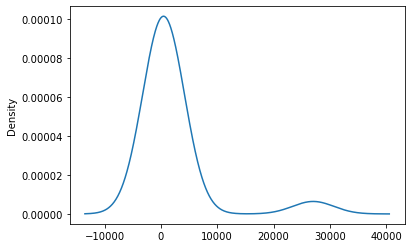

In [8]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_df.plot.density()
#  YOUR CODE GOES HERE

In [9]:
# Determine which values to replace if counts are less than ...?
replace_values = list(Application_type_df[Application_type_df < 150].index)
# REplace the DataFrame
for values in replace_values:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(values, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_type_df = application_df.CLASSIFICATION.value_counts()
CLASSIFICATION_type_df
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1728        1
C1283        1
C8210        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

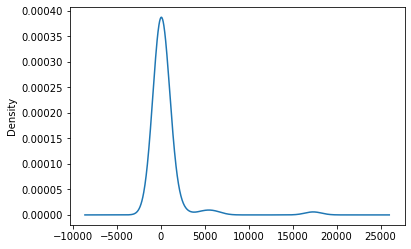

In [11]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_type_df.plot.density()
#  YOUR CODE GOES HERE

In [12]:
# Determine which values to replace if counts are less than ..?
replace_values2 = list(CLASSIFICATION_type_df[CLASSIFICATION_type_df < 1880].index)
# REplace the DataFrame
for values in replace_values2:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(values, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application
#  YOUR CODE GOES HERE

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application]))
#  YOUR CODE GOES HERE

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application)
encode_df.head(10)

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application, 1)
application_df.head()
#  YOUR CODE GOES HERE

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#  YOUR CODE GOES HERE

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[1])
hidden_nodes_layer1 = 300
hidden_nodes_layer2 = 25

#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation= "linear")
)

#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="linear"))
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 300)               13500     
                                                                 
 dense_10 (Dense)            (None, 25)                7525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 21,051
Trainable params: 21,051
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)
#  YOUR CODE GOES HERE

In [ ]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])
#  YOUR CODE GOES HERE

Epoch 1/100
  1/804 [..............................] - ETA: 7:45 - loss: 9.6406 - accuracy: 0.3750
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 8.1945 - accuracy: 0.4688  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 8.1945 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 8.2588 - accuracy: 0.4646
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 8.3753 - accuracy: 0.4570
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/

355/804 [============>.................] - ETA: 3s - loss: 8.2407 - accuracy: 0.4658
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
365/804 [============>.................] - ETA: 3s - loss: 8.2368 - accuracy: 0.4660
Epoch 00001: saving model to checkpoints/weights.01.hdf5
374/804 [============>.................] - ETA: 3s - loss: 8.2461 - accuracy: 0.4654
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
380/804 [=============>................] - ETA: 3s - loss: 8.2554 - accuracy: 0.4648
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
390/804 [=============>................] - ETA: 3s - loss: 8.2476 - accuracy: 0.4653
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
400/804 [=============>................] - ETA: 3s - loss:

750/804 [==========================>...] - ETA: 0s - loss: 8.2318 - accuracy: 0.4663
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 8.2332 - accuracy: 0.4662
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 8.2358 - accuracy: 0.4661
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
780/804 [============================>.] - ETA: 0s - loss: 8.2359 - accuracy: 0.4661
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5


336/804 [===========>..................] - ETA: 2s - loss: 8.3121 - accuracy: 0.4611
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 8.3115 - accuracy: 0.4612
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
356/804 [============>.................] - ETA: 2s - loss: 8.3137 - accuracy: 0.4610
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
366/804 [============>.................] - ETA: 2s - loss: 8.2985 - accuracy: 0.4620
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
376/804 [=============>................] - ETA: 2s - loss: 8.3137 - accuracy: 0.4610
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5


737/804 [==========================>...] - ETA: 0s - loss: 8.2566 - accuracy: 0.4647
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 8.2546 - accuracy: 0.4649
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 8.2423 - accuracy: 0.4656
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2416 - accuracy: 0.4657
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00002: saving model to checkpoints/weights.02.hdf5
784/804 [============================>.] - ETA: 0s - loss:

327/804 [===========>..................] - ETA: 2s - loss: 8.2328 - accuracy: 0.4663
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 8.2145 - accuracy: 0.4675
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 8.2348 - accuracy: 0.4661
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
357/804 [============>.................] - ETA: 2s - loss: 8.2458 - accuracy: 0.4654
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
367/804 [============>.................] - ETA: 2s - loss: 8.2497 - accuracy: 0.4652
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5



Epoch 00003: saving model to checkpoints/weights.03.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 8.2423 - accuracy: 0.4657
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 8.2481 - accuracy: 0.4653
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 8.2517 - accuracy: 0.4650
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2497 - accuracy: 0.4652
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2472 - accuracy: 0.4653
Epoch 00003: saving model to checkpoints/weights.03.hdf5


323/804 [===========>..................] - ETA: 2s - loss: 8.3124 - accuracy: 0.4611
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 8.2756 - accuracy: 0.4635
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 8.2493 - accuracy: 0.4652
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
353/804 [============>.................] - ETA: 2s - loss: 8.2587 - accuracy: 0.4646
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
363/804 [============>.................] - ETA: 2s - loss: 8.2476 - accuracy: 0.4653
Epoch 00004: saving model to checkpoints/weights.04.hdf5
370/804 [============>.................] - ETA: 2s - loss:

718/804 [=========================>....] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2335 - accuracy: 0.4662
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 8.2330 - accuracy: 0.4663
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 8.2278 - accuracy: 0.4666
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 8.2257 - accuracy: 0.4667
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5


299/804 [==========>...................] - ETA: 3s - loss: 8.2638 - accuracy: 0.4643
Epoch 00005: saving model to checkpoints/weights.05.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 8.2571 - accuracy: 0.4647
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 8.2482 - accuracy: 0.4653
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 8.2405 - accuracy: 0.4658
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 8.2522 - accuracy: 0.4650
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
344/804 [===========>..................] - ETA: 2s - loss:


Epoch 00005: saving model to checkpoints/weights.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 8.2535 - accuracy: 0.4649
Epoch 00005: saving model to checkpoints/weights.05.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2531 - accuracy: 0.4649
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2509 - accuracy: 0.4651
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 8.2569 - accuracy: 0.4647
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2600 - accuracy: 0.4645
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5


275/804 [=========>....................] - ETA: 3s - loss: 8.2331 - accuracy: 0.4663
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 8.2283 - accuracy: 0.4666
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 8.2370 - accuracy: 0.4660
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 8.2372 - accuracy: 0.4660
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 8.2358 - accuracy: 0.4661
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5


679/804 [========================>.....] - ETA: 0s - loss: 8.2407 - accuracy: 0.4658
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8.2402 - accuracy: 0.4658
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 8.2431 - accuracy: 0.4656
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 8.2465 - accuracy: 0.4654
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 8.2498 - accuracy: 0.4652
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5



Epoch 00007: saving model to checkpoints/weights.07.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 8.1892 - accuracy: 0.4691
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 8.1859 - accuracy: 0.4693
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 8.1995 - accuracy: 0.4684
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 8.1881 - accuracy: 0.4692
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 8.1976 - accuracy: 0.4685
Epoch 00007: saving model to checkpoints/weights.07.hdf5



Epoch 00007: saving model to checkpoints/weights.07.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 8.2646 - accuracy: 0.4642
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.2614 - accuracy: 0.4644
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2674 - accuracy: 0.4640
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2664 - accuracy: 0.4641
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2614 - accuracy: 0.4644
Epoch 00007: saving model to checkpoints/weights.07.hdf5


277/804 [=========>....................] - ETA: 2s - loss: 8.3041 - accuracy: 0.4616
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 8.3033 - accuracy: 0.4617
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 8.2794 - accuracy: 0.4632
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 8.2793 - accuracy: 0.4633
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 8.2764 - accuracy: 0.4634
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5



Epoch 00008: saving model to checkpoints/weights.08.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 8.2440 - accuracy: 0.4655
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 8.2372 - accuracy: 0.4660
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2286 - accuracy: 0.4665
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 8.2314 - accuracy: 0.4664
Epoch 00008: saving model to checkpoints/weights.08.hdf5


283/804 [=========>....................] - ETA: 3s - loss: 8.1945 - accuracy: 0.4688
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 8.2142 - accuracy: 0.4675
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 8.2200 - accuracy: 0.4671
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 8.2297 - accuracy: 0.4665
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 8.2540 - accuracy: 0.4649
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5


693/804 [========================>.....] - ETA: 0s - loss: 8.2237 - accuracy: 0.4669
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 8.2261 - accuracy: 0.4667
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 8.2269 - accuracy: 0.4666
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 8.2389 - accuracy: 0.4659
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8.2456 - accuracy: 0.4654
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5


301/804 [==========>...................] - ETA: 2s - loss: 8.1689 - accuracy: 0.4704
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 8.1680 - accuracy: 0.4705
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 8.1854 - accuracy: 0.4693
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 8.1725 - accuracy: 0.4702
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5


694/804 [========================>.....] - ETA: 0s - loss: 8.1910 - accuracy: 0.4690
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 8.2000 - accuracy: 0.4684
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 8.2019 - accuracy: 0.4683
Epoch 00010: saving model to checkpoints/weights.10.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2105 - accuracy: 0.4677
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2071 - accuracy: 0.4679
Epoch 00010: saving model to checkpoints/weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 8.2109 - accuracy: 0.4677
Epoch 00010: saving model to ch

260/804 [========>.....................] - ETA: 3s - loss: 8.1945 - accuracy: 0.4688
Epoch 00011: saving model to checkpoints/weights.11.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 8.2250 - accuracy: 0.4668
Epoch 00011: saving model to checkpoints/weights.11.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 8.2139 - accuracy: 0.4675
Epoch 00011: saving model to checkpoints/weights.11.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 8.2326 - accuracy: 0.4663
Epoch 00011: saving model to checkpoints/weights.11.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 8.2357 - accuracy: 0.4661
Epoch 00011: saving model to checkpoints/weights.11.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 8.2147 - accuracy: 0.4674
Epoch 00011: saving model to checkpoints/weights.11.hdf5
293/804 [=========>....................] - ETA: 3s - loss: 8.2241 - accuracy: 0.4668
Epoch 00011: saving model to checkpoints/weights.11.hdf5
295/80

608/804 [=====================>........] - ETA: 1s - loss: 8.2230 - accuracy: 0.4669
Epoch 00011: saving model to checkpoints/weights.11.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 8.2261 - accuracy: 0.4667
Epoch 00011: saving model to checkpoints/weights.11.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 8.2265 - accuracy: 0.4667
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 8.2362 - accuracy: 0.4660
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 8.2423 - accuracy: 0.4656
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 8.2438 - accuracy: 0.4656
Epoch 00011: saving model to ch


Epoch 00012: saving model to checkpoints/weights.12.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 8.1178 - accuracy: 0.4737
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 8.1198 - accuracy: 0.4736
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 8.1182 - accuracy: 0.4737
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 8.1340 - accuracy: 0.4727
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 8.1648 - accuracy: 0.4707
Epoch 00012: saving model to checkpoints/weights.12.hdf5



Epoch 00012: saving model to checkpoints/weights.12.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 8.2330 - accuracy: 0.4663
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 8.2309 - accuracy: 0.4664
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2333 - accuracy: 0.4662
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 8.2229 - accuracy: 0.4669
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 8.2336 - accuracy: 0.4662
Epoch 00012: saving model to checkpoints/weights.12.hdf5


211/804 [======>.......................] - ETA: 3s - loss: 8.3681 - accuracy: 0.4575
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 8.3367 - accuracy: 0.4595
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 8.3325 - accuracy: 0.4598
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 8.3186 - accuracy: 0.4607
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 8.3506 - accuracy: 0.4586
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5



Epoch 00013: saving model to checkpoints/weights.13.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 8.2371 - accuracy: 0.4660
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 8.2365 - accuracy: 0.4660
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 8.2403 - accuracy: 0.4658
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 8.2353 - accuracy: 0.4661
Epoch 00013: saving model to checkpoints/weights.13.hdf5


210/804 [======>.......................] - ETA: 3s - loss: 8.1922 - accuracy: 0.4689
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 8.2033 - accuracy: 0.4682
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 8.2217 - accuracy: 0.4670
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 8.2573 - accuracy: 0.4647
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 8.2645 - accuracy: 0.4642
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5



Epoch 00014: saving model to checkpoints/weights.14.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 8.2711 - accuracy: 0.4638
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2751 - accuracy: 0.4635
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2650 - accuracy: 0.4642
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 8.2617 - accuracy: 0.4644
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.2519 - accuracy: 0.4650
Epoch 00014: saving model to checkpoints/weights.14.hdf5


214/804 [======>.......................] - ETA: 3s - loss: 8.1675 - accuracy: 0.4705
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 8.1665 - accuracy: 0.4706
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 8.1904 - accuracy: 0.4690
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 8.1866 - accuracy: 0.4693
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 8.1794 - accuracy: 0.4697
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5


619/804 [======================>.......] - ETA: 1s - loss: 8.2366 - accuracy: 0.4660
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 8.2313 - accuracy: 0.4664
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 8.2315 - accuracy: 0.4664
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 8.2296 - accuracy: 0.4665
Epoch 00015: saving model to checkpoints/weights.15.hdf5
667/804 [=======================>......] - ETA: 0s - loss:

220/804 [=======>......................] - ETA: 3s - loss: 8.3457 - accuracy: 0.4589
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 8.2972 - accuracy: 0.4621
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 8.3070 - accuracy: 0.4615
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 8.3179 - accuracy: 0.4608
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 8.3039 - accuracy: 0.4617
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5


625/804 [======================>.......] - ETA: 0s - loss: 8.2161 - accuracy: 0.4674
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 8.2158 - accuracy: 0.4674
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 8.2289 - accuracy: 0.4665
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2350 - accuracy: 0.4661
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 8.2416 - accuracy: 0.4657
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5


226/804 [=======>......................] - ETA: 3s - loss: 8.3481 - accuracy: 0.4588
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 8.3620 - accuracy: 0.4579
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 8.3519 - accuracy: 0.4585
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 8.3659 - accuracy: 0.4576
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 8.3449 - accuracy: 0.4590
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5


640/804 [======================>.......] - ETA: 0s - loss: 8.3316 - accuracy: 0.4599
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.3154 - accuracy: 0.4609
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 8.3202 - accuracy: 0.4606
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.3168 - accuracy: 0.4608
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 8.3145 - accuracy: 0.4610
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5


232/804 [=======>......................] - ETA: 3s - loss: 8.2236 - accuracy: 0.4669
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 8.2065 - accuracy: 0.4680
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 8.2308 - accuracy: 0.4664
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 8.2589 - accuracy: 0.4646
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 8.2757 - accuracy: 0.4635
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5


632/804 [======================>.......] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.2298 - accuracy: 0.4665
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 8.2293 - accuracy: 0.4665
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 8.2382 - accuracy: 0.4659
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 8.2404 - accuracy: 0.4658
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5


223/804 [=======>......................] - ETA: 3s - loss: 8.2853 - accuracy: 0.4629
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 8.2421 - accuracy: 0.4657
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 8.2600 - accuracy: 0.4645
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 8.2574 - accuracy: 0.4647
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 8.2385 - accuracy: 0.4659
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5


628/804 [======================>.......] - ETA: 0s - loss: 8.2697 - accuracy: 0.4639
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2595 - accuracy: 0.4645
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2577 - accuracy: 0.4647
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2612 - accuracy: 0.4644
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 8.2450 - accuracy: 0.4655
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5


219/804 [=======>......................] - ETA: 3s - loss: 8.2693 - accuracy: 0.4639
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 8.2513 - accuracy: 0.4651
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 8.2510 - accuracy: 0.4651
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 8.2293 - accuracy: 0.4665
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 8.2150 - accuracy: 0.4674
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5


629/804 [======================>.......] - ETA: 1s - loss: 8.2275 - accuracy: 0.4666
Epoch 00020: saving model to checkpoints/weights.20.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2333 - accuracy: 0.4662
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2341 - accuracy: 0.4662
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5


225/804 [=======>......................] - ETA: 3s - loss: 8.2352 - accuracy: 0.4661
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 8.2581 - accuracy: 0.4646
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 8.2533 - accuracy: 0.4649
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 8.2682 - accuracy: 0.4640
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 8.2473 - accuracy: 0.4653
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5


630/804 [======================>.......] - ETA: 0s - loss: 8.2672 - accuracy: 0.4640
Epoch 00021: saving model to checkpoints/weights.21.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2693 - accuracy: 0.4639
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2644 - accuracy: 0.4642
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2634 - accuracy: 0.4643
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 8.2733 - accuracy: 0.4636
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
675/804 [========================>.....] - ETA: 0s - loss:

210/804 [======>.......................] - ETA: 5s - loss: 8.3047 - accuracy: 0.4616
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 8.3061 - accuracy: 0.4615
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 8.3281 - accuracy: 0.4601
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 8.3258 - accuracy: 0.4602
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 8.3225 - accuracy: 0.4604

617/804 [======================>.......] - ETA: 1s - loss: 8.2094 - accuracy: 0.4678
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 8.2138 - accuracy: 0.4675
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 8.2191 - accuracy: 0.4672
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5


204/804 [======>.......................] - ETA: 4s - loss: 8.1874 - accuracy: 0.4692
Epoch 00023: saving model to checkpoints/weights.23.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 8.2014 - accuracy: 0.4683
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 8.1878 - accuracy: 0.4692
Epoch 00023: saving model to checkpoints/weights.23.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 8.1581 - accuracy: 0.4711
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 8.1654 - accuracy: 0.4706
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 8.2005 - accuracy: 0.4684
Epoch 00023: saving model to ch


Epoch 00023: saving model to checkpoints/weights.23.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 8.2626 - accuracy: 0.4643
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 8.2685 - accuracy: 0.4640
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 8.2720 - accuracy: 0.4637
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 8.2738 - accuracy: 0.4636
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 8.2741 - accuracy: 0.4636
Epoch 00023: saving model to checkpoints/weights.23.hdf5



Epoch 00024: saving model to checkpoints/weights.24.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 8.0496 - accuracy: 0.4781
Epoch 00024: saving model to checkpoints/weights.24.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 8.0782 - accuracy: 0.4763
Epoch 00024: saving model to checkpoints/weights.24.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 8.1099 - accuracy: 0.4742
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 8.1244 - accuracy: 0.4733
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 8.1145 - accuracy: 0.4739
Epoch 00024: saving model to checkpoints/weights.24.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 8.1152 - accuracy: 0.4739
Epoch 00024: saving model to ch

588/804 [====================>.........] - ETA: 1s - loss: 8.2216 - accuracy: 0.4670
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 8.2179 - accuracy: 0.4672
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 8.2104 - accuracy: 0.4677
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 8.2140 - accuracy: 0.4675
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 8.2360 - accuracy: 0.4661
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5


179/804 [=====>........................] - ETA: 3s - loss: 8.2645 - accuracy: 0.4642
Epoch 00025: saving model to checkpoints/weights.25.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 8.2596 - accuracy: 0.4645
Epoch 00025: saving model to checkpoints/weights.25.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 8.2522 - accuracy: 0.4650
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 8.2623 - accuracy: 0.4644
Epoch 00025: saving model to checkpoints/weights.25.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 8.2647 - accuracy: 0.4642
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 8.2666 - accuracy: 0.4641
Epoch 00025: saving model to checkpoints/weights.25.hdf5
219/804 [=======>...............

572/804 [====================>.........] - ETA: 1s - loss: 8.2400 - accuracy: 0.4658
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 8.2278 - accuracy: 0.4666
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 8.2289 - accuracy: 0.4665
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 8.2259 - accuracy: 0.4667
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 8.2301 - accuracy: 0.4664
Epoch 00025: saving model to checkpoints/weights.25.hdf5
618/804 [======================>.......] - ETA: 1s - loss:

135/804 [====>.........................] - ETA: 5s - loss: 8.2159 - accuracy: 0.4674
Epoch 00026: saving model to checkpoints/weights.26.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 8.2386 - accuracy: 0.4659
Epoch 00026: saving model to checkpoints/weights.26.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 8.2107 - accuracy: 0.4677
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 8.1852 - accuracy: 0.4694
Epoch 00026: saving model to checkpoints/weights.26.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 8.1945 - accuracy: 0.4688
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
170/804 [=====>........................] - ETA: 4s - loss: 8.2058 - accuracy: 0.4680
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to ch

490/804 [=================>............] - ETA: 2s - loss: 8.2329 - accuracy: 0.4663
Epoch 00026: saving model to checkpoints/weights.26.hdf5
497/804 [=================>............] - ETA: 2s - loss: 8.2197 - accuracy: 0.4671
Epoch 00026: saving model to checkpoints/weights.26.hdf5
500/804 [=================>............] - ETA: 2s - loss: 8.2282 - accuracy: 0.4666
Epoch 00026: saving model to checkpoints/weights.26.hdf5
506/804 [=================>............] - ETA: 2s - loss: 8.2250 - accuracy: 0.4668
Epoch 00026: saving model to checkpoints/weights.26.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 8.2153 - accuracy: 0.4674
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 8.2028 - accuracy: 0.4682
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
530/804 [==================>....

 53/804 [>.............................] - ETA: 5s - loss: 8.1945 - accuracy: 0.4688
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 8.1787 - accuracy: 0.4698
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 71/804 [=>............................] - ETA: 5s - loss: 8.2013 - accuracy: 0.4683
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 81/804 [==>...........................] - ETA: 5s - loss: 8.1826 - accuracy: 0.4695
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 8.1733 - accuracy: 0.4701
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5


411/804 [==============>...............] - ETA: 3s - loss: 8.2356 - accuracy: 0.4661
Epoch 00027: saving model to checkpoints/weights.27.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 8.2463 - accuracy: 0.4654
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 8.2466 - accuracy: 0.4654
Epoch 00027: saving model to checkpoints/weights.27.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 8.2400 - accuracy: 0.4658
Epoch 00027: saving model to checkpoints/weights.27.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 8.2387 - accuracy: 0.4659
Epoch 00027: saving model to checkpoints/weights.27.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 8.2522 - accuracy: 0.4650
Epoch 00027: saving model to checkpoints/weights.27.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 8.2550 - accuracy: 0.4648
Epoch

789/804 [============================>.] - ETA: 0s - loss: 8.2495 - accuracy: 0.4652
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
796/804 [============================>.] - ETA: 0s - loss: 8.2351 - accuracy: 0.4661
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 28/100
  1/804 [..............................] - ETA: 9s - loss: 6.2664 - accuracy: 0.5938
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
  7/804 [..............................] - ETA: 10s - loss: 7.7813 - accuracy: 0.4955
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 12/804 [..............................] - ETA: 10s - loss: 8.2347 - accuracy: 0.4661
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 20/804 [..............................] - ETA: 7s - loss: 8.4837 - ac

322/804 [===========>..................] - ETA: 4s - loss: 8.2304 - accuracy: 0.4664
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 8.2323 - accuracy: 0.4663
Epoch 00028: saving model to checkpoints/weights.28.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 8.2171 - accuracy: 0.4673
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
350/804 [============>.................] - ETA: 4s - loss: 8.2207 - accuracy: 0.4671
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
357/804 [============>.................] - ETA: 4s - loss: 8.2242 - accuracy: 0.4668
Epoch 00028: saving model to checkpoints/weights.28.hdf5
365/804 [============>.................] - ETA: 3s - loss: 8.2209 - accuracy: 0.4670
Epoch 00028: saving model to ch


Epoch 00028: saving model to checkpoints/weights.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 8.2385 - accuracy: 0.4659
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2426 - accuracy: 0.4656
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 8.2459 - accuracy: 0.4654
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 8.2471 - accuracy: 0.4653
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 8.2528 - accuracy: 0.4650
Epoch 00028: saving model to checkpoints/weights.28.hdf5


264/804 [========>.....................] - ETA: 4s - loss: 8.3278 - accuracy: 0.4601
Epoch 00029: saving model to checkpoints/weights.29.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 8.3168 - accuracy: 0.4608
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 8.3141 - accuracy: 0.4610
Epoch 00029: saving model to checkpoints/weights.29.hdf5
286/804 [=========>....................] - ETA: 4s - loss: 8.3125 - accuracy: 0.4611
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 8.3179 - accuracy: 0.4608
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 8.3186 - accuracy: 0.4607
Epoch 00029: saving model to ch

633/804 [======================>.......] - ETA: 1s - loss: 8.2714 - accuracy: 0.4638
Epoch 00029: saving model to checkpoints/weights.29.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 8.2723 - accuracy: 0.4637
Epoch 00029: saving model to checkpoints/weights.29.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 8.2642 - accuracy: 0.4642
Epoch 00029: saving model to checkpoints/weights.29.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 8.2629 - accuracy: 0.4643
Epoch 00029: saving model to checkpoints/weights.29.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 8.2658 - accuracy: 0.4641
Epoch 00029: saving model to checkpoints/weights.29.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 8.2661 - accuracy: 0.4641
Epoch 00029: saving model to checkpoints/weights.29.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 8.2679 - accuracy: 0.4640
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch

174/804 [=====>........................] - ETA: 5s - loss: 8.2915 - accuracy: 0.4625
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 8.2993 - accuracy: 0.4620
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
194/804 [======>.......................] - ETA: 5s - loss: 8.2889 - accuracy: 0.4626
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 8.2678 - accuracy: 0.4640
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
214/804 [======>.......................] - ETA: 4s - loss: 8.2643 - accuracy: 0.4642
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5



Epoch 00030: saving model to checkpoints/weights.30.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 8.2437 - accuracy: 0.4656
Epoch 00030: saving model to checkpoints/weights.30.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 8.2333 - accuracy: 0.4662
Epoch 00030: saving model to checkpoints/weights.30.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 8.2392 - accuracy: 0.4659
Epoch 00030: saving model to checkpoints/weights.30.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 8.2404 - accuracy: 0.4658
Epoch 00030: saving model to checkpoints/weights.30.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 8.2375 - accuracy: 0.4660
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 8.2462 - accuracy: 0.4654
Epoch 00030: saving model to checkpoints/weights.30.hdf5
574/804 [====================>..

 82/804 [==>...........................] - ETA: 8s - loss: 8.1886 - accuracy: 0.4691
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 89/804 [==>...........................] - ETA: 7s - loss: 8.2107 - accuracy: 0.4677
Epoch 00031: saving model to checkpoints/weights.31.hdf5
 94/804 [==>...........................] - ETA: 7s - loss: 8.2663 - accuracy: 0.4641
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
100/804 [==>...........................] - ETA: 7s - loss: 8.3246 - accuracy: 0.4603
Epoch 00031: saving model to checkpoints/weights.31.hdf5
105/804 [==>...........................] - ETA: 7s - loss: 8.3460 - accuracy: 0.4589
Epoch 00031: saving model to checkpoints/weights.31.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 8.3303 - accuracy: 0.4599
Epoch 00031: saving model to checkpoints/weights.31.hdf5
116/804 [===>..........................] - ETA: 7s - loss: 8.3566 - accuracy: 0.4582
Epoch


Epoch 00031: saving model to checkpoints/weights.31.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 8.2461 - accuracy: 0.4654
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 8.2394 - accuracy: 0.4658
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 8.2481 - accuracy: 0.4653
Epoch 00031: saving model to checkpoints/weights.31.hdf5
456/804 [================>.............] - ETA: 3s - loss: 8.2484 - accuracy: 0.4653
Epoch 00031: saving model to checkpoints/weights.31.hdf5
463/804 [================>.............] - ETA: 2s - loss: 8.2507 - accuracy: 0.4651
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
470/804 [================>.............] - ETA: 2s - loss:

777/804 [===========================>..] - ETA: 0s - loss: 8.2355 - accuracy: 0.4661
Epoch 00031: saving model to checkpoints/weights.31.hdf5
782/804 [============================>.] - ETA: 0s - loss: 8.2389 - accuracy: 0.4659
Epoch 00031: saving model to checkpoints/weights.31.hdf5
789/804 [============================>.] - ETA: 0s - loss: 8.2422 - accuracy: 0.4657
Epoch 00031: saving model to checkpoints/weights.31.hdf5
794/804 [============================>.] - ETA: 0s - loss: 8.2394 - accuracy: 0.4658
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 32/100

Epoch 00032: saving model to checkpoints/weights.32.hdf5
  1/804 [..............................] - ETA: 16s - loss: 8.1945 - accuracy: 0.4688
Epoch 00032: saving model to checkpoints/weights.32.hdf5
 10/804 [..............................] - ETA: 4s - loss: 8.3391 - acc


Epoch 00032: saving model to checkpoints/weights.32.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 8.2906 - accuracy: 0.4625
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 8.2739 - accuracy: 0.4636
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
356/804 [============>.................] - ETA: 3s - loss: 8.2622 - accuracy: 0.4644
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
366/804 [============>.................] - ETA: 3s - loss: 8.2748 - accuracy: 0.4635
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
376/804 [=============>................] - ETA: 3s - loss: 8.2663 - accuracy: 0.4641
Epoch 00032: saving model to checkpoints/weights.32.hdf5


687/804 [========================>.....] - ETA: 0s - loss: 8.2668 - accuracy: 0.4641
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 8.2686 - accuracy: 0.4639
Epoch 00032: saving model to checkpoints/weights.32.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2653 - accuracy: 0.4642
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2576 - accuracy: 0.4647
Epoch 00032: saving model to checkpoints/weights.32.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 8.2596 - accuracy: 0.4645
Epoch 00032: saving model to checkpoints/weights.32.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 8.2603 - accuracy: 0.4645
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to ch


Epoch 00033: saving model to checkpoints/weights.33.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 8.3086 - accuracy: 0.4614
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 8.3310 - accuracy: 0.4599
Epoch 00033: saving model to checkpoints/weights.33.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 8.3384 - accuracy: 0.4594
Epoch 00033: saving model to checkpoints/weights.33.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 8.3364 - accuracy: 0.4596
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 8.3414 - accuracy: 0.4592
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
302/804 [==========>...................] - ETA: 3s - loss:

605/804 [=====================>........] - ETA: 1s - loss: 8.2359 - accuracy: 0.4661
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 8.2386 - accuracy: 0.4659
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 8.2395 - accuracy: 0.4658
Epoch 00033: saving model to checkpoints/weights.33.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 8.2376 - accuracy: 0.4660
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
647/804 [=======================>......] - ETA: 1s - loss:

190/804 [======>.......................] - ETA: 3s - loss: 8.0727 - accuracy: 0.4766
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 8.0484 - accuracy: 0.4782
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 8.0995 - accuracy: 0.4749
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 8.0795 - accuracy: 0.4762
Epoch 00034: saving model to checkpoints/weights.34.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 8.0762 - accuracy: 0.4764
Epoch 00034: saving model to checkpoints/weights.34.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 8.0797 - accuracy: 0.4762
Epoch 00034: saving model to ch

543/804 [===================>..........] - ETA: 2s - loss: 8.2256 - accuracy: 0.4667
Epoch 00034: saving model to checkpoints/weights.34.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 8.2253 - accuracy: 0.4668
Epoch 00034: saving model to checkpoints/weights.34.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 8.2206 - accuracy: 0.4671
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 8.2142 - accuracy: 0.4675
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 8.2004 - accuracy: 0.4684
Epoch 00034: saving model to checkpoints/weights.34.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 8.2086 - accuracy: 0.4678
Epoch 00034: saving model to checkpoints/weights.34.hdf5
587/804 [====================>..


Epoch 00035: saving model to checkpoints/weights.35.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 8.2255 - accuracy: 0.4667
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
119/804 [===>..........................] - ETA: 5s - loss: 8.2107 - accuracy: 0.4677
Epoch 00035: saving model to checkpoints/weights.35.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 8.2136 - accuracy: 0.4675
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 8.2233 - accuracy: 0.4669
Epoch 00035: saving model to checkpoints/weights.35.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 8.2222 - accuracy: 0.4670
Epoch 00035: saving model to checkpoints/weights.35.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 8.2240 - accuracy: 0.4668
Epoch 00035: saving model to ch

479/804 [================>.............] - ETA: 2s - loss: 8.2811 - accuracy: 0.4631
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
489/804 [=================>............] - ETA: 2s - loss: 8.2773 - accuracy: 0.4634
Epoch 00035: saving model to checkpoints/weights.35.hdf5
497/804 [=================>............] - ETA: 2s - loss: 8.2605 - accuracy: 0.4645
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
504/804 [=================>............] - ETA: 2s - loss: 8.2624 - accuracy: 0.4643
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 8.2599 - accuracy: 0.4645
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
524/804 [==================>...........] - ETA: 2s - loss:

 55/804 [=>............................] - ETA: 4s - loss: 8.1419 - accuracy: 0.4722
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 65/804 [=>............................] - ETA: 4s - loss: 8.2316 - accuracy: 0.4663
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 73/804 [=>............................] - ETA: 4s - loss: 8.1879 - accuracy: 0.4692
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 8.1945 - accuracy: 0.4688
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 8.1825 - accuracy: 0.4695
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 8.1435 - accuracy: 0.4721
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 95/804 [==>....................

406/804 [==============>...............] - ETA: 3s - loss: 8.2349 - accuracy: 0.4661
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 8.2235 - accuracy: 0.4669
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 8.2229 - accuracy: 0.4669
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 8.2167 - accuracy: 0.4673
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 8.2173 - accuracy: 0.4673
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5



Epoch 00036: saving model to checkpoints/weights.36.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 8.2440 - accuracy: 0.4655
Epoch 00036: saving model to checkpoints/weights.36.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8.2492 - accuracy: 0.4652
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
786/804 [============================>.] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
795/804 [============================>.] - ETA: 0s - loss: 8.2382 - accuracy: 0.4659
Epoch 00036: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 37/100

Epoch 00037: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 15s - loss: 9.1586 - accuracy: 0.4062
Epoch 00037:

336/804 [===========>..................] - ETA: 3s - loss: 8.2490 - accuracy: 0.4652
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 8.2447 - accuracy: 0.4655
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
356/804 [============>.................] - ETA: 3s - loss: 8.2311 - accuracy: 0.4664
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
366/804 [============>.................] - ETA: 3s - loss: 8.2340 - accuracy: 0.4662
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
376/804 [=============>................] - ETA: 2s - loss: 8.2368 - accuracy: 0.4660
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5


692/804 [========================>.....] - ETA: 0s - loss: 8.2370 - accuracy: 0.4660
Epoch 00037: saving model to checkpoints/weights.37.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 8.2380 - accuracy: 0.4659
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 8.2382 - accuracy: 0.4659
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 8.2463 - accuracy: 0.4654
Epoch 00037: saving model to checkpoints/weights.37.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2432 - accuracy: 0.4656
Epoch 00037: saving model to checkpoints/weights.37.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2408 - accuracy: 0.4657
Epoch 00037: saving model to checkpoints/weights.37.hdf5
731/804 [=======================

272/804 [=========>....................] - ETA: 3s - loss: 8.1732 - accuracy: 0.4701
Epoch 00038: saving model to checkpoints/weights.38.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 8.1876 - accuracy: 0.4692
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 8.1911 - accuracy: 0.4690
Epoch 00038: saving model to checkpoints/weights.38.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 8.1994 - accuracy: 0.4684
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 8.2009 - accuracy: 0.4683
Epoch 00038: saving model to checkpoints/weights.38.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 8.1852 - accuracy: 0.4694
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to ch

Epoch 00038: saving model to checkpoints/weights.38.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 8.2304 - accuracy: 0.4664
Epoch 00038: saving model to checkpoints/weights.38.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 8.2293 - accuracy: 0.4665
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 8.2197 - accuracy: 0.4671
Epoch 00038: saving model to checkpoints/weights.38.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 8.2236 - accuracy: 0.4669
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 

191/804 [======>.......................] - ETA: 4s - loss: 8.2576 - accuracy: 0.4647
Epoch 00039: saving model to checkpoints/weights.39.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 8.2489 - accuracy: 0.4652
Epoch 00039: saving model to checkpoints/weights.39.hdf5
200/804 [======>.......................] - ETA: 4s - loss: 8.2427 - accuracy: 0.4656
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 8.2385 - accuracy: 0.4659
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 8.2407 - accuracy: 0.4658
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
228/804 [=======>......................] - ETA: 4s - loss: 8.2326 - accuracy: 0.4663
Epoch 00039: saving model to ch

578/804 [====================>.........] - ETA: 1s - loss: 8.2354 - accuracy: 0.4661
Epoch 00039: saving model to checkpoints/weights.39.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 8.2365 - accuracy: 0.4660
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 8.2368 - accuracy: 0.4660
Epoch 00039: saving model to checkpoints/weights.39.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 8.2305 - accuracy: 0.4664
Epoch 00039: saving model to checkpoints/weights.39.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 8.2374 - accuracy: 0.4660
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 8.2378 - accuracy: 0.4659
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to ch

154/804 [====>.........................] - ETA: 4s - loss: 8.2258 - accuracy: 0.4667
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 8.2827 - accuracy: 0.4630
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 8.2748 - accuracy: 0.4635
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 8.2836 - accuracy: 0.4630
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 8.2442 - accuracy: 0.4655
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5


549/804 [===================>..........] - ETA: 1s - loss: 8.2393 - accuracy: 0.4658
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 8.2419 - accuracy: 0.4657
Epoch 00040: saving model to checkpoints/weights.40.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 8.2539 - accuracy: 0.4649
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 8.2558 - accuracy: 0.4648
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 8.2688 - accuracy: 0.4639
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
594/804 [=====================>........] - ETA: 1s - loss:

135/804 [====>.........................] - ETA: 4s - loss: 8.2659 - accuracy: 0.4641
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
145/804 [====>.........................] - ETA: 4s - loss: 8.2577 - accuracy: 0.4647
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
155/804 [====>.........................] - ETA: 3s - loss: 8.3065 - accuracy: 0.4615
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 8.3493 - accuracy: 0.4587
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 8.3377 - accuracy: 0.4595
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5


541/804 [===================>..........] - ETA: 1s - loss: 8.2426 - accuracy: 0.4656
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 8.2453 - accuracy: 0.4655
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 8.2512 - accuracy: 0.4651
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 8.2477 - accuracy: 0.4653
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5


136/804 [====>.........................] - ETA: 4s - loss: 8.3044 - accuracy: 0.4616
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 8.3134 - accuracy: 0.4610
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 8.3027 - accuracy: 0.4617
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 8.2642 - accuracy: 0.4642
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 8.2329 - accuracy: 0.4663
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5


541/804 [===================>..........] - ETA: 1s - loss: 8.1856 - accuracy: 0.4693
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 8.2093 - accuracy: 0.4678
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 8.2040 - accuracy: 0.4681
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 8.2139 - accuracy: 0.4675
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 8.2045 - accuracy: 0.4681
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5


142/804 [====>.........................] - ETA: 3s - loss: 8.2862 - accuracy: 0.4628
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 8.3087 - accuracy: 0.4613
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 8.2957 - accuracy: 0.4622
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 8.3206 - accuracy: 0.4606
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 8.2740 - accuracy: 0.4636
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5


547/804 [===================>..........] - ETA: 1s - loss: 8.2359 - accuracy: 0.4661
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 8.2360 - accuracy: 0.4661
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 8.2438 - accuracy: 0.4656
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 8.2446 - accuracy: 0.4655
Epoch 00043: saving model to checkpoints/weights.43.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 8.2513 - accuracy: 0.4651
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
592/804 [=====================>........] - ETA: 1s - loss:


Epoch 00044: saving model to checkpoints/weights.44.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 8.2958 - accuracy: 0.4622
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 8.2466 - accuracy: 0.4654
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 8.2342 - accuracy: 0.4662
Epoch 00044: saving model to checkpoints/weights.44.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 8.2898 - accuracy: 0.4626
Epoch 00044: saving model to checkpoints/weights.44.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 8.2791 - accuracy: 0.4633
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
178/804 [=====>........................] - ETA: 4s - loss:

Epoch 00044: saving model to checkpoints/weights.44.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 8.2079 - accuracy: 0.4679
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 8.2042 - accuracy: 0.4681
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 8.2049 - accuracy: 0.4681
Epoch 00044: saving model to checkpoints/weights.44.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 8.2132 - accuracy: 0.4675
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 8.2139 - accuracy: 0.4675
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
5

123/804 [===>..........................] - ETA: 4s - loss: 8.1671 - accuracy: 0.4705
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
129/804 [===>..........................] - ETA: 4s - loss: 8.2020 - accuracy: 0.4683
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 8.2118 - accuracy: 0.4676
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 8.2624 - accuracy: 0.4643
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 8.2813 - accuracy: 0.4631
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5


524/804 [==================>...........] - ETA: 1s - loss: 8.2727 - accuracy: 0.4637
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 8.2559 - accuracy: 0.4648
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 8.2583 - accuracy: 0.4646
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 8.2545 - accuracy: 0.4649
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 8.2526 - accuracy: 0.4650
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5


110/804 [===>..........................] - ETA: 5s - loss: 8.1463 - accuracy: 0.4719
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 8.1463 - accuracy: 0.4719
Epoch 00046: saving model to checkpoints/weights.46.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 8.2059 - accuracy: 0.4680
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
135/804 [====>.........................] - ETA: 4s - loss: 8.1838 - accuracy: 0.4694
Epoch 00046: saving model to checkpoints/weights.46.hdf5
143/804 [====>.........................] - ETA: 4s - loss: 8.1743 - accuracy: 0.4701
Epoch 00046: saving model to checkpoints/weights.46.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 8.2010 - accuracy: 0.4683
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to ch

500/804 [=================>............] - ETA: 2s - loss: 8.1984 - accuracy: 0.4685
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 8.2142 - accuracy: 0.4675
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 8.2250 - accuracy: 0.4668
Epoch 00046: saving model to checkpoints/weights.46.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 8.2294 - accuracy: 0.4665
Epoch 00046: saving model to checkpoints/weights.46.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 8.2309 - accuracy: 0.4664
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 8.2374 - accuracy: 0.4660
Epoch 00046: saving model to ch

 91/804 [==>...........................] - ETA: 3s - loss: 8.2316 - accuracy: 0.4663
Epoch 00047: saving model to checkpoints/weights.47.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 8.2668 - accuracy: 0.4641
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
106/804 [==>...........................] - ETA: 4s - loss: 8.2764 - accuracy: 0.4634
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
116/804 [===>..........................] - ETA: 4s - loss: 8.2277 - accuracy: 0.4666
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 8.2060 - accuracy: 0.4680
Epoch 00047: saving model to checkpoints/weights.47.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 8.2628 - accuracy: 0.4643
Epoch 00047: saving model to ch


Epoch 00047: saving model to checkpoints/weights.47.hdf5
471/804 [================>.............] - ETA: 2s - loss: 8.2979 - accuracy: 0.4620
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
481/804 [================>.............] - ETA: 2s - loss: 8.2977 - accuracy: 0.4621
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
491/804 [=================>............] - ETA: 2s - loss: 8.2868 - accuracy: 0.4628
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
503/804 [=================>............] - ETA: 1s - loss: 8.2836 - accuracy: 0.4630
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 8.2785 - accuracy: 0.4633
Epoch 00047: saving model to checkpoints/weights.47.hdf5


 57/804 [=>............................] - ETA: 5s - loss: 8.3044 - accuracy: 0.4616
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 8.3600 - accuracy: 0.4580
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 8.3385 - accuracy: 0.4594
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 8.3386 - accuracy: 0.4594
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 8.2989 - accuracy: 0.4620
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5



Epoch 00048: saving model to checkpoints/weights.48.hdf5
457/804 [================>.............] - ETA: 2s - loss: 8.3105 - accuracy: 0.4612
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
467/804 [================>.............] - ETA: 2s - loss: 8.3070 - accuracy: 0.4615
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
477/804 [================>.............] - ETA: 2s - loss: 8.3218 - accuracy: 0.4605
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
487/804 [=================>............] - ETA: 2s - loss: 8.3093 - accuracy: 0.4613
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
500/804 [=================>............] - ETA: 1s - loss: 8.2851 - accuracy: 0.4629
Epoch 00048: saving model to checkpoints/weights.48.hdf5


 27/804 [>.............................] - ETA: 7s - loss: 8.2124 - accuracy: 0.4676
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 33/804 [>.............................] - ETA: 7s - loss: 8.0776 - accuracy: 0.4763
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 40/804 [>.............................] - ETA: 7s - loss: 8.1342 - accuracy: 0.4727
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 8.1342 - accuracy: 0.4727
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 8.0782 - accuracy: 0.4763
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 8.1873 - accuracy: 0.4692
Epoch 00049: saving model to ch

418/804 [==============>...............] - ETA: 2s - loss: 8.2372 - accuracy: 0.4660
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 8.2508 - accuracy: 0.4651
Epoch 00049: saving model to checkpoints/weights.49.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 8.2401 - accuracy: 0.4658
Epoch 00049: saving model to checkpoints/weights.49.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 8.2384 - accuracy: 0.4659
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 8.2408 - accuracy: 0.4658
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
458/804 [================>.............] - ETA: 2s - loss: 8.2408 - accuracy: 0.4657
Epoch 00049: saving model to ch

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
  9/804 [..............................] - ETA: 7s - loss: 8.1409 - accuracy: 0.4722
Epoch 00050: saving model to checkpoints/weights.50.hdf5
 18/804 [..............................] - ETA: 5s - loss: 7.9535 - accuracy: 0.4844
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 8.2302 - accuracy: 0.4664
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 8.1256 - accuracy: 0.4732
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 44/804 [>.............................] - ETA: 4s - loss: 8.3041 - accuracy: 0.4616
Epoch 00050: saving model to checkpoints/weights.50.hdf5



349/804 [============>.................] - ETA: 3s - loss: 8.2884 - accuracy: 0.4627
Epoch 00050: saving model to checkpoints/weights.50.hdf5
354/804 [============>.................] - ETA: 3s - loss: 8.2708 - accuracy: 0.4638
Epoch 00050: saving model to checkpoints/weights.50.hdf5
362/804 [============>.................] - ETA: 3s - loss: 8.2558 - accuracy: 0.4648
Epoch 00050: saving model to checkpoints/weights.50.hdf5
367/804 [============>.................] - ETA: 3s - loss: 8.2576 - accuracy: 0.4647
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
374/804 [============>.................] - ETA: 3s - loss: 8.2628 - accuracy: 0.4643
Epoch 00050: saving model to checkpoints/weights.50.hdf5
381/804 [=============>................] - ETA: 3s - loss: 8.2742 - accuracy: 0.4636
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
389/804 [=============>.........

709/804 [=========================>....] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00050: saving model to checkpoints/weights.50.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 8.2343 - accuracy: 0.4662
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 8.2345 - accuracy: 0.4662
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 8.2254 - accuracy: 0.4667
Epoch 00050: saving model to checkpoints/weights.50.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 8.2244 - accuracy: 0.4668
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00050: saving model to ch

243/804 [========>.....................] - ETA: 5s - loss: 8.1588 - accuracy: 0.4711
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
253/804 [========>.....................] - ETA: 5s - loss: 8.1278 - accuracy: 0.4731
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 8.1407 - accuracy: 0.4722
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 8.1642 - accuracy: 0.4707
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 8.1244 - accuracy: 0.4733
Epoch 00051: saving model to checkpoints/weights.51.hdf5
286/804 [=========>....................] - ETA: 4s - loss:

613/804 [=====================>........] - ETA: 1s - loss: 8.2275 - accuracy: 0.4666
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 8.2279 - accuracy: 0.4666
Epoch 00051: saving model to checkpoints/weights.51.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 8.2330 - accuracy: 0.4663
Epoch 00051: saving model to checkpoints/weights.51.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 8.2288 - accuracy: 0.4665
Epoch 00051: saving model to checkpoints/weights.51.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 8.2218 - accuracy: 0.4670
Epoch 00051: saving model to checkpoints/weights.51.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 8.2200 - accuracy: 0.4671
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
650/804 [=======================

151/804 [====>.........................] - ETA: 5s - loss: 8.1243 - accuracy: 0.4733
Epoch 00052: saving model to checkpoints/weights.52.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 8.1389 - accuracy: 0.4724
Epoch 00052: saving model to checkpoints/weights.52.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 8.1376 - accuracy: 0.4724
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
171/804 [=====>........................] - ETA: 5s - loss: 8.1550 - accuracy: 0.4713
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 8.1519 - accuracy: 0.4715
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
191/804 [======>.......................] - ETA: 4s - loss: 8.1339 - accuracy: 0.4727
Epoch 00052: saving model to ch

530/804 [==================>...........] - ETA: 1s - loss: 8.2181 - accuracy: 0.4672
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 8.2188 - accuracy: 0.4672
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 8.2183 - accuracy: 0.4672
Epoch 00052: saving model to checkpoints/weights.52.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 8.2199 - accuracy: 0.4671
Epoch 00052: saving model to checkpoints/weights.52.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 8.2109 - accuracy: 0.4677
Epoch 00052: saving model to checkpoints/weights.52.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 8.2167 - accuracy: 0.4673
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to ch


Epoch 00053: saving model to checkpoints/weights.53.hdf5
 92/804 [==>...........................] - ETA: 4s - loss: 8.1997 - accuracy: 0.4684
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 8.2748 - accuracy: 0.4635
Epoch 00053: saving model to checkpoints/weights.53.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 8.2704 - accuracy: 0.4638
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 8.2893 - accuracy: 0.4626
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 8.2590 - accuracy: 0.4646
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5


455/804 [===============>..............] - ETA: 2s - loss: 8.2634 - accuracy: 0.4643
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
462/804 [================>.............] - ETA: 2s - loss: 8.2613 - accuracy: 0.4644
Epoch 00053: saving model to checkpoints/weights.53.hdf5
467/804 [================>.............] - ETA: 2s - loss: 8.2647 - accuracy: 0.4642
Epoch 00053: saving model to checkpoints/weights.53.hdf5
476/804 [================>.............] - ETA: 2s - loss: 8.2644 - accuracy: 0.4642
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
482/804 [================>.............] - ETA: 2s - loss: 8.2655 - accuracy: 0.4641
Epoch 00053: saving model to checkpoints/weights.53.hdf5
490/804 [=================>............] - ETA: 2s - loss: 8.2634 - accuracy: 0.4643
Epoch 00053: saving model to checkpoints/weights.53.hdf5
493/804 [=================>.....

  5/804 [..............................] - ETA: 10s - loss: 8.9658 - accuracy: 0.4187
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 13/804 [..............................] - ETA: 7s - loss: 8.5282 - accuracy: 0.4471 
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 18/804 [..............................] - ETA: 8s - loss: 8.6498 - accuracy: 0.4392
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 23/804 [..............................] - ETA: 8s - loss: 8.5717 - accuracy: 0.4443
Epoch 00054: saving model to checkpoints/weights.54.hdf5
 28/804 [>.............................] - ETA: 8s - loss: 8.4699 - accuracy: 0.4509
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 38/804 [>.............................] - ETA: 7s - loss: 8.4863 - accuracy: 0.4498
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to 

362/804 [============>.................] - ETA: 3s - loss: 8.2398 - accuracy: 0.4658
Epoch 00054: saving model to checkpoints/weights.54.hdf5
367/804 [============>.................] - ETA: 3s - loss: 8.2405 - accuracy: 0.4658
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
373/804 [============>.................] - ETA: 3s - loss: 8.2384 - accuracy: 0.4659
Epoch 00054: saving model to checkpoints/weights.54.hdf5
380/804 [=============>................] - ETA: 3s - loss: 8.2249 - accuracy: 0.4668
Epoch 00054: saving model to checkpoints/weights.54.hdf5
383/804 [=============>................] - ETA: 3s - loss: 8.2310 - accuracy: 0.4664
Epoch 00054: saving model to checkpoints/weights.54.hdf5
388/804 [=============>................] - ETA: 3s - loss: 8.2330 - accuracy: 0.4663
Epoch 00054: saving model to checkpoints/weights.54.hdf5
396/804 [=============>................] - ETA: 3s - loss: 8.2335 - accuracy: 0.4662
Epoch

736/804 [==========================>...] - ETA: 0s - loss: 8.2201 - accuracy: 0.4671
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00054: saving model to checkpoints/weights.54.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 8.2272 - accuracy: 0.4666
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2259 - accuracy: 0.4667
Epoch 00054: saving model to checkpoints/weights.54.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2305 - accuracy: 0.4664
Epoch 00054: saving model to ch


Epoch 00055: saving model to checkpoints/weights.55.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 8.2550 - accuracy: 0.4648
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 8.2312 - accuracy: 0.4664
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 8.2122 - accuracy: 0.4676
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
309/804 [==========>...................] - ETA: 4s - loss: 8.2039 - accuracy: 0.4681
Epoch 00055: saving model to checkpoints/weights.55.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 8.2036 - accuracy: 0.4682
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5


651/804 [=======================>......] - ETA: 1s - loss: 8.2478 - accuracy: 0.4653
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 8.2406 - accuracy: 0.4658
Epoch 00055: saving model to checkpoints/weights.55.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 8.2381 - accuracy: 0.4659
Epoch 00055: saving model to checkpoints/weights.55.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 8.2406 - accuracy: 0.4658
Epoch 00055: saving model to checkpoints/weights.55.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 8.2381 - accuracy: 0.4659
Epoch 00055: saving model to checkpoints/weights.55.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2392 - accuracy: 0.4659
Epoch 00055: saving model to checkpoints/weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8.2333 - accuracy: 0.4662
Epoch

188/804 [======>.......................] - ETA: 5s - loss: 8.1817 - accuracy: 0.4696
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 8.2069 - accuracy: 0.4679
Epoch 00056: saving model to checkpoints/weights.56.hdf5
200/804 [======>.......................] - ETA: 5s - loss: 8.2138 - accuracy: 0.4675
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 8.2106 - accuracy: 0.4677
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 8.2274 - accuracy: 0.4666
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
230/804 [=======>......................] - ETA: 4s - loss:

549/804 [===================>..........] - ETA: 2s - loss: 8.2296 - accuracy: 0.4665
Epoch 00056: saving model to checkpoints/weights.56.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 8.2363 - accuracy: 0.4660
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 8.2384 - accuracy: 0.4659
Epoch 00056: saving model to checkpoints/weights.56.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 8.2419 - accuracy: 0.4657
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 8.2406 - accuracy: 0.4658
Epoch 00056: saving model to checkpoints/weights.56.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 8.2327 - accuracy: 0.4663
Epoch 00056: saving model to checkpoints/weights.56.hdf5
585/804 [====================>..

106/804 [==>...........................] - ETA: 5s - loss: 8.3355 - accuracy: 0.4596
Epoch 00057: saving model to checkpoints/weights.57.hdf5
113/804 [===>..........................] - ETA: 5s - loss: 8.3523 - accuracy: 0.4585
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 8.3339 - accuracy: 0.4597
Epoch 00057: saving model to checkpoints/weights.57.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 8.3016 - accuracy: 0.4618
Epoch 00057: saving model to checkpoints/weights.57.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 8.3032 - accuracy: 0.4617
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 8.2663 - accuracy: 0.4641
Epoch 00057: saving model to checkpoints/weights.57.hdf5
150/804 [====>..................

477/804 [================>.............] - ETA: 2s - loss: 8.2561 - accuracy: 0.4648
Epoch 00057: saving model to checkpoints/weights.57.hdf5
481/804 [================>.............] - ETA: 2s - loss: 8.2476 - accuracy: 0.4653
Epoch 00057: saving model to checkpoints/weights.57.hdf5
486/804 [=================>............] - ETA: 2s - loss: 8.2471 - accuracy: 0.4653
Epoch 00057: saving model to checkpoints/weights.57.hdf5
491/804 [=================>............] - ETA: 2s - loss: 8.2534 - accuracy: 0.4649
Epoch 00057: saving model to checkpoints/weights.57.hdf5
500/804 [=================>............] - ETA: 2s - loss: 8.2524 - accuracy: 0.4650
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
506/804 [=================>............] - ETA: 2s - loss: 8.2555 - accuracy: 0.4648
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
516/804 [==================>....

 37/804 [>.............................] - ETA: 4s - loss: 8.2075 - accuracy: 0.4679
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 8.3176 - accuracy: 0.4608
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 8.3467 - accuracy: 0.4589
Epoch 00058: saving model to checkpoints/weights.58.hdf5
 66/804 [=>............................] - ETA: 4s - loss: 8.2748 - accuracy: 0.4635
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 8.2949 - accuracy: 0.4622
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 82/804 [==>...........................] - ETA: 4s - loss:

371/804 [============>.................] - ETA: 3s - loss: 8.2140 - accuracy: 0.4675
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
377/804 [=============>................] - ETA: 3s - loss: 8.2162 - accuracy: 0.4673
Epoch 00058: saving model to checkpoints/weights.58.hdf5
385/804 [=============>................] - ETA: 3s - loss: 8.2208 - accuracy: 0.4670
Epoch 00058: saving model to checkpoints/weights.58.hdf5
390/804 [=============>................] - ETA: 3s - loss: 8.2303 - accuracy: 0.4664
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
397/804 [=============>................] - ETA: 3s - loss: 8.2188 - accuracy: 0.4672
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 8.2182 - accuracy: 0.4672
Epoch 00058: saving model to ch

747/804 [==========================>...] - ETA: 0s - loss: 8.2545 - accuracy: 0.4649
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2518 - accuracy: 0.4650
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 8.2586 - accuracy: 0.4646
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2362 - accuracy: 0.4660
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5


307/804 [==========>...................] - ETA: 3s - loss: 8.2447 - accuracy: 0.4655
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 8.2576 - accuracy: 0.4647
Epoch 00059: saving model to checkpoints/weights.59.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 8.2636 - accuracy: 0.4643
Epoch 00059: saving model to checkpoints/weights.59.hdf5
327/804 [===========>..................] - ETA: 3s - loss: 8.2667 - accuracy: 0.4641
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
333/804 [===========>..................] - ETA: 3s - loss: 8.2640 - accuracy: 0.4642
Epoch 00059: saving model to checkpoints/weights.59.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 8.2656 - accuracy: 0.4641
Epoch 00059: saving model to checkpoints/weights.59.hdf5
343/804 [===========>...........

663/804 [=======================>......] - ETA: 1s - loss: 8.2127 - accuracy: 0.4676
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 8.2117 - accuracy: 0.4676
Epoch 00059: saving model to checkpoints/weights.59.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2073 - accuracy: 0.4679
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 8.2183 - accuracy: 0.4672
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 8.2166 - accuracy: 0.4673
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
708/804 [=========================>....] - ETA: 0s - loss:

219/804 [=======>......................] - ETA: 4s - loss: 8.3200 - accuracy: 0.4606
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
229/804 [=======>......................] - ETA: 4s - loss: 8.2955 - accuracy: 0.4622
Epoch 00060: saving model to checkpoints/weights.60.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 8.3078 - accuracy: 0.4614
Epoch 00060: saving model to checkpoints/weights.60.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 8.3225 - accuracy: 0.4605
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 8.3165 - accuracy: 0.4608
Epoch 00060: saving model to checkpoints/weights.60.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 8.3060 - accuracy: 0.4615
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to ch


Epoch 00060: saving model to checkpoints/weights.60.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 8.2407 - accuracy: 0.4658
Epoch 00060: saving model to checkpoints/weights.60.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 8.2386 - accuracy: 0.4659
Epoch 00060: saving model to checkpoints/weights.60.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 8.2284 - accuracy: 0.4666
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 8.2374 - accuracy: 0.4660
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 8.2440 - accuracy: 0.4655
Epoch 00060: saving model to checkpoints/weights.60.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 8.2419 - accuracy: 0.4657
Epoch 00060: saving model to ch

135/804 [====>.........................] - ETA: 6s - loss: 8.2766 - accuracy: 0.4634
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 8.2643 - accuracy: 0.4642
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 8.2754 - accuracy: 0.4635
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 8.2938 - accuracy: 0.4623
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 8.3295 - accuracy: 0.4600
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5



Epoch 00061: saving model to checkpoints/weights.61.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 8.2170 - accuracy: 0.4673
Epoch 00061: saving model to checkpoints/weights.61.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 8.2193 - accuracy: 0.4671
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 8.2331 - accuracy: 0.4663
Epoch 00061: saving model to checkpoints/weights.61.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 8.2277 - accuracy: 0.4666
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
577/804 [====================>.........] - ETA: 1s - loss:

116/804 [===>..........................] - ETA: 4s - loss: 8.1696 - accuracy: 0.4704
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 8.1180 - accuracy: 0.4737
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
136/804 [====>.........................] - ETA: 4s - loss: 8.1307 - accuracy: 0.4729
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 8.1978 - accuracy: 0.4685
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 8.2038 - accuracy: 0.4681
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5



Epoch 00062: saving model to checkpoints/weights.62.hdf5
481/804 [================>.............] - ETA: 2s - loss: 8.2105 - accuracy: 0.4677
Epoch 00062: saving model to checkpoints/weights.62.hdf5
486/804 [=================>............] - ETA: 2s - loss: 8.2044 - accuracy: 0.4681
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
496/804 [=================>............] - ETA: 2s - loss: 8.2042 - accuracy: 0.4681
Epoch 00062: saving model to checkpoints/weights.62.hdf5
503/804 [=================>............] - ETA: 2s - loss: 8.2041 - accuracy: 0.4681
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 8.2134 - accuracy: 0.4675
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
521/804 [==================>...........] - ETA: 2s - loss:

 47/804 [>.............................] - ETA: 5s - loss: 8.0612 - accuracy: 0.4774
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 8.1018 - accuracy: 0.4748
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 8.1392 - accuracy: 0.4723
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 8.1369 - accuracy: 0.4725
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 8.0693 - accuracy: 0.4769
Epoch 00063: saving model to checkpoints/weights.63.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 8.1016 - accuracy: 0.4748
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to ch

423/804 [==============>...............] - ETA: 2s - loss: 8.1569 - accuracy: 0.4712
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 8.1633 - accuracy: 0.4708
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 8.1597 - accuracy: 0.4710
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
457/804 [================>.............] - ETA: 2s - loss: 8.1776 - accuracy: 0.4698
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
467/804 [================>.............] - ETA: 2s - loss: 8.1625 - accuracy: 0.4708
Epoch 00063: saving model to checkpoints/weights.63.hdf5


  8/804 [..............................] - ETA: 6s - loss: 8.4958 - accuracy: 0.4492
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 16/804 [..............................] - ETA: 5s - loss: 8.4958 - accuracy: 0.4492
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 22/804 [..............................] - ETA: 5s - loss: 8.4574 - accuracy: 0.4517
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 28/804 [>.............................] - ETA: 6s - loss: 8.3839 - accuracy: 0.4565
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 8.5243 - accuracy: 0.4474
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 8.6346 - accuracy: 0.4402
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 48/804 [>......................

386/804 [=============>................] - ETA: 2s - loss: 8.2582 - accuracy: 0.4646
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
398/804 [=============>................] - ETA: 2s - loss: 8.2611 - accuracy: 0.4644
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 8.2524 - accuracy: 0.4650
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 8.2395 - accuracy: 0.4658
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 8.2339 - accuracy: 0.4662
Epoch 00064: saving model to checkpoints/weights.64.hdf5


793/804 [============================>.] - ETA: 0s - loss: 8.2431 - accuracy: 0.4656
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 8.2384 - accuracy: 0.4659
Epoch 65/100
  1/804 [..............................] - ETA: 2s - loss: 9.1586 - accuracy: 0.4062
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
  9/804 [..............................] - ETA: 5s - loss: 7.9267 - accuracy: 0.4861
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 19/804 [..............................] - ETA: 4s - loss: 8.3721 - accuracy: 0.4572
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 8.2111 - accuracy: 0.4677
Epoch 00065: 


Epoch 00065: saving model to checkpoints/weights.65.hdf5
399/804 [=============>................] - ETA: 2s - loss: 8.2175 - accuracy: 0.4673
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 8.2251 - accuracy: 0.4668
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 8.2405 - accuracy: 0.4658
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 8.2406 - accuracy: 0.4658
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 8.2328 - accuracy: 0.4663
Epoch 00065: saving model to checkpoints/weights.65.hdf5


Epoch 66/100
  1/804 [..............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 12/804 [..............................] - ETA: 3s - loss: 8.6364 - accuracy: 0.4401
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 20/804 [..............................] - ETA: 4s - loss: 8.0740 - accuracy: 0.4766
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 8.3712 - accuracy: 0.4573
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 8.3512 - accuracy: 0.4586
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/wei


Epoch 00066: saving model to checkpoints/weights.66.hdf5
395/804 [=============>................] - ETA: 2s - loss: 8.2519 - accuracy: 0.4650
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 8.2350 - accuracy: 0.4661
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 8.2259 - accuracy: 0.4667
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 8.2330 - accuracy: 0.4663
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 8.2410 - accuracy: 0.4657
Epoch 00066: saving model to checkpoints/weights.66.hdf5


In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 6.3243 - accuracy: 0.4815 - 535ms/epoch - 2ms/step
Loss: 6.32430362701416, Accuracy: 0.481516033411026


In [ ]:
# Save to an HDF5 file
nn.save("trained_application.h5")